Congrats! You just graduated UVA's BSDS program and got a job working at a movie studio in Hollywood. 

Your boss is the head of the studio and wants to know if they can gain a competitive advantage by predicting new movies that might get high imdb scores (movie rating). 

You would like to be able to explain the model to mere mortals but need a fairly robust and flexible approach so you've chosen to use decision trees to get started. 

In doing so, similar to  great data scientists of the past you remembered the excellent education provided to you at UVA in a undergrad data science course and have outline 20ish steps that will need to be undertaken to complete this task. As always, you will need to make sure to #comment your work heavily. 

 Footnotes: 
-	You can add or combine steps if needed
-	Also, remember to try several methods during evaluation and always be mindful of how the model will be used in practice.
- Make sure all your variables are the correct type (factor, character,numeric, etc.)

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [5]:
#1. Load the data
#Sometimes need to set the working directory back out of a folder that we create a file in

#import os
#os.listdir()
#print(os.getcwd())
#os.chdir('c:\\Users\\Brian Wright\\Documents\\3001Python\\DS-3001')

movie_metadata=pd.read_csv("/workspaces/DS-3021/data/movie_metadata.csv")



#2 Ensure all the variables are classified correctly including the target variable and collapse factor variables as needed.

In [6]:
movie_metadata.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

#3 Check for missing variables and correct as needed.

In [7]:
movie_metadata.isna().sum()
movie1 = movie_metadata.drop(['color', 'director_name', 'actor_2_name', 'actor_1_name', 'movie_title', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'genres', 'movie_imdb_link', 'language', 'country', 'title_year', 'aspect_ratio'], axis=1)
movie1 = movie1.dropna()
abc = list(movie1.select_dtypes('number'))  
movie1[abc] = MinMaxScaler().fit_transform(movie1[abc])

In [8]:
movie1['imdb_score'] = movie1['imdb_score'].apply(lambda x: 1 if x >= 0.8 else 0)
movie1.head(10)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,content_rating,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,0.889163,0.481229,0.000000,0.037174,0.001563,1.000000,0.524448,0.007361,0.603479,PG-13,0.019402,0.006832,1,0.094556
1,0.370690,0.450512,0.024478,0.043478,0.062500,0.406840,0.278858,0.073622,0.244515,PG-13,0.024559,0.036496,0,0.000000
2,0.740148,0.378840,0.000000,0.007000,0.017188,0.263080,0.163247,0.017816,0.196284,PG-13,0.020056,0.002869,0,0.243553
3,1.000000,0.433447,0.956522,1.000000,0.042188,0.589253,0.677213,0.162561,0.533702,PG-13,0.020466,0.167883,1,0.469914
5,0.567734,0.324232,0.020652,0.023043,0.001000,0.096066,0.125571,0.002852,0.145681,PG-13,0.021587,0.004613,0,0.068768
6,0.481527,0.406143,0.000000,0.173913,0.037500,0.442508,0.226682,0.070128,0.375766,PG-13,0.021121,0.080292,0,0.000000
7,0.397783,0.215017,0.000652,0.012348,0.001248,0.264044,0.174457,0.003100,0.076300,PG,0.021284,0.004036,1,0.083095
8,0.780788,0.354949,0.000000,0.826087,0.040625,0.603535,0.273797,0.140088,0.220597,PG-13,0.020466,0.153285,0,0.338109
9,0.460591,0.395904,0.012261,0.434783,0.039062,0.397047,0.190427,0.089463,0.192133,PG,0.020466,0.080292,0,0.028653
10,0.827586,0.498294,0.000000,0.086957,0.023438,0.434249,0.219925,0.037230,0.596363,PG-13,0.020466,0.029197,0,0.564470


In [9]:
object_list = list(movie1.select_dtypes('object'))

movie1 = pd.get_dummies(movie1, columns = object_list) 

#4 Guess what, you don't need to scale the data, because DTs don't require this to be done, they make local greedy decisions...keeps getting easier, go to the next step.

I scaled it anyways because I thought it would be easier to convert the imdb score into 0's and 1's :,)

#5 Determine the baserate or prevalence for the classifier, what does this number mean?

In [10]:
print(movie1["imdb_score"].value_counts()) #Great!

imdb_score
0    3481
1     352
Name: count, dtype: int64


In [11]:
352/(3481+352)

0.09183407252804592

This value shows the proportion of high imdb scores in the dataset. This is important because it will help us determine if our model is better than just guessing the success of the movie.

#6 Split your data into test, tune, and train. (80/10/10)

In [12]:
X= movie1.drop(columns='imdb_score')
y= movie1.imdb_score

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify= y, random_state=21)
X_tune, X_test, y_tune, y_test = train_test_split(X_test,y_test,  train_size = 0.50,stratify= y_test, random_state=49)

#7 Create the kfold object for cross validation.

In [14]:
kf = RepeatedStratifiedKFold(n_splits=10,n_repeats =5, random_state=42)

#8 Create the scoring metric you will use to evaluate your model and the max depth hyperparameter 

In [15]:
scoring = ['roc_auc','recall','balanced_accuracy']

#9 Build the classifier object 

In [16]:
cl= DecisionTreeClassifier(random_state=1000, criterion='gini')

#10 Use the kfold object and the scoring metric to find the best hyperparameter value for max depth via the grid search method.

In [17]:
param={"max_depth" : [1,2,3,4,5,6,7,8,9,10,11]}

search = GridSearchCV(cl, param, scoring=scoring, n_jobs=-1, cv=kf,refit='roc_auc', verbose=3)

#11 Fit the model to the training data.

In [18]:
model = search.fit(X_train, y_train)

Fitting 50 folds for each of 11 candidates, totalling 550 fits


[CV 8/50] END max_depth=1; balanced_accuracy: (test=0.741) recall: (test=0.500) roc_auc: (test=0.741) total time=   0.1s
[CV 13/50] END max_depth=1; balanced_accuracy: (test=0.668) recall: (test=0.357) roc_auc: (test=0.668) total time=   0.1s
[CV 14/50] END max_depth=1; balanced_accuracy: (test=0.746) recall: (test=0.536) roc_auc: (test=0.746) total time=   0.1s
[CV 15/50] END max_depth=1; balanced_accuracy: (test=0.703) recall: (test=0.414) roc_auc: (test=0.703) total time=   0.1s
[CV 16/50] END max_depth=1; balanced_accuracy: (test=0.627) recall: (test=0.276) roc_auc: (test=0.627) total time=   0.1s
[CV 17/50] END max_depth=1; balanced_accuracy: (test=0.618) recall: (test=0.250) roc_auc: (test=0.618) total time=   0.1s
[CV 18/50] END max_depth=1; balanced_accuracy: (test=0.764) recall: (test=0.536) roc_auc: (test=0.764) total time=   0.2s
[CV 2/50] END max_depth=1; balanced_accuracy: (test=0.691) recall: (test=0.429) roc_auc: (test=0.691) total time=   0.1s
[CV 3/50] END max_depth=1;

#12 What is the best depth value?

In [19]:
best = model.best_estimator_
print(best)

DecisionTreeClassifier(max_depth=4, random_state=1000)


#13 Print out the model

In [20]:
print(model.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'params', 'split0_test_roc_auc', 'split1_test_roc_auc', 'split2_test_roc_auc', 'split3_test_roc_auc', 'split4_test_roc_auc', 'split5_test_roc_auc', 'split6_test_roc_auc', 'split7_test_roc_auc', 'split8_test_roc_auc', 'split9_test_roc_auc', 'split10_test_roc_auc', 'split11_test_roc_auc', 'split12_test_roc_auc', 'split13_test_roc_auc', 'split14_test_roc_auc', 'split15_test_roc_auc', 'split16_test_roc_auc', 'split17_test_roc_auc', 'split18_test_roc_auc', 'split19_test_roc_auc', 'split20_test_roc_auc', 'split21_test_roc_auc', 'split22_test_roc_auc', 'split23_test_roc_auc', 'split24_test_roc_auc', 'split25_test_roc_auc', 'split26_test_roc_auc', 'split27_test_roc_auc', 'split28_test_roc_auc', 'split29_test_roc_auc', 'split30_test_roc_auc', 'split31_test_roc_auc', 'split32_test_roc_auc', 'split33_test_roc_auc', 'split34_test_roc_auc', 'split35_test_roc_auc', 'split36_test_roc_auc', 'split37_tes

In [21]:
auc = model.cv_results_['mean_test_roc_auc']
recall= model.cv_results_['mean_test_recall']
bal_acc= model.cv_results_['mean_test_balanced_accuracy']

SDauc = model.cv_results_['std_test_roc_auc']
SDrecall= model.cv_results_['std_test_recall']
SDbal_acc= model.cv_results_['std_test_balanced_accuracy']

#Parameter:
depth= np.unique(model.cv_results_['param_max_depth']).data

#Build DataFrame:
final_model = pd.DataFrame(list(zip(depth, auc, recall, bal_acc,SDauc,SDrecall,SDbal_acc)),
               columns =['depth','auc','recall','bal_acc','aucSD','recallSD','bal_accSD'])

#Let's take a look
final_model.style.hide(axis='index')

depth,auc,recall,bal_acc,aucSD,recallSD,bal_accSD
1,0.686672,0.393522,0.686672,0.046156,0.096217,0.046156
2,0.791581,0.330394,0.661749,0.044374,0.078597,0.039281
3,0.808437,0.426946,0.704745,0.041231,0.088378,0.044473
4,0.829954,0.414877,0.698855,0.038864,0.096046,0.047754
5,0.825068,0.444655,0.711733,0.048846,0.086108,0.042602
6,0.800217,0.482167,0.728120,0.056502,0.091686,0.044505
7,0.763695,0.481379,0.726360,0.062807,0.075529,0.036283
8,0.729853,0.510517,0.739995,0.071244,0.085215,0.042506
9,0.710163,0.521305,0.743449,0.078204,0.079051,0.038841
10,0.700106,0.523374,0.743911,0.073503,0.071667,0.035566


#14 View the results, comment on how the model performed using several evaluation metrics.

From the results above, we can see that the highest AUC with a depth of 4, which is the best depth value. The model performed well with an AUC of 0.82, which is a good value. However, when evaluated with recall and accuracy, we can see that it has a recall score of 0.4 at a depth of 4, which isn't great.  The accuracy is also around 0.7, which is just okay, but could most certainly be improved (especially with our prevalence being around 0.1)

#15 Which variables appear to be contributing the most (variable importance) 

In [22]:
varimp=pd.DataFrame(best.feature_importances_,index = X.columns,columns=['importance']).sort_values('importance', ascending=False)
print(varimp)

                           importance
num_voted_users              0.707956
gross                        0.126341
budget                       0.049850
movie_facebook_likes         0.031059
actor_1_facebook_likes       0.027778
num_critic_for_reviews       0.023890
duration                     0.022373
actor_3_facebook_likes       0.010752
cast_total_facebook_likes    0.000000
director_facebook_likes      0.000000
num_user_for_reviews         0.000000
actor_2_facebook_likes       0.000000
content_rating_Approved      0.000000
content_rating_G             0.000000
content_rating_GP            0.000000
content_rating_M             0.000000
content_rating_NC-17         0.000000
content_rating_Not Rated     0.000000
content_rating_PG            0.000000
content_rating_PG-13         0.000000
content_rating_Passed        0.000000
content_rating_R             0.000000
content_rating_Unrated       0.000000
content_rating_X             0.000000


We can see that the number of voted users is the more important variable in predicting the imdb score.

#16 Use the predict method on the tune data and print out the results.

In [23]:
model2 = search.fit(X_tune, y_tune)
best2 = model2.best_estimator_

y_pred = best2.predict(X_tune)
y_pred_prob = best2.predict_proba(X_tune)[:,1]

auc = model2.cv_results_['mean_test_roc_auc']
recall= model2.cv_results_['mean_test_recall']
bal_acc= model2.cv_results_['mean_test_balanced_accuracy']

SDauc = model2.cv_results_['std_test_roc_auc']
SDrecall= model2.cv_results_['std_test_recall']
SDbal_acc= model2.cv_results_['std_test_balanced_accuracy']

#Parameter:
depth= np.unique(model2.cv_results_['param_max_depth']).data

#Build DataFrame:
final_model2 = pd.DataFrame(list(zip(depth, auc, recall, bal_acc,SDauc,SDrecall,SDbal_acc)),
               columns =['depth','auc','recall','bal_acc','aucSD','recallSD','bal_accSD'])

#Let's take a look
final_model2.style.hide(axis='index')

Fitting 50 folds for each of 11 candidates, totalling 550 fits
[CV 8/50] END max_depth=1; balanced_accuracy: (test=0.805) recall: (test=0.667) roc_auc: (test=0.805) total time=   0.0s
[CV 4/50] END max_depth=1; balanced_accuracy: (test=1.000) recall: (test=1.000) roc_auc: (test=1.000) total time=   0.1s
[CV 1/50] END max_depth=1; balanced_accuracy: (test=0.500) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 5/50] END max_depth=1; balanced_accuracy: (test=0.833) recall: (test=0.667) roc_auc: (test=0.833) total time=   0.1s
[CV 6/50] END max_depth=1; balanced_accuracy: (test=0.805) recall: (test=0.667) roc_auc: (test=0.805) total time=   0.1s
[CV 2/50] END max_depth=1; balanced_accuracy: (test=0.625) recall: (test=0.250) roc_auc: (test=0.625) total time=   0.1s
[CV 7/50] END max_depth=1; balanced_accuracy: (test=0.500) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 3/50] END max_depth=1; balanced_accuracy: (test=0.750) recall: (test=0.500) roc_auc: (

depth,auc,recall,bal_acc,aucSD,recallSD,bal_accSD
1,0.701630,0.420000,0.701630,0.131867,0.265079,0.131867
2,0.812377,0.370000,0.678924,0.141162,0.258285,0.130044
3,0.784115,0.366667,0.670653,0.160207,0.233333,0.119784
4,0.785363,0.383333,0.675255,0.164293,0.222985,0.116920
5,0.787655,0.433333,0.696549,0.150099,0.225462,0.118000
6,0.762389,0.455000,0.707088,0.174661,0.261518,0.137695
7,0.733444,0.465000,0.705206,0.140975,0.243293,0.127612
8,0.718929,0.460000,0.702403,0.138455,0.239931,0.127425
9,0.703578,0.463333,0.703793,0.122058,0.231036,0.121810
10,0.703793,0.463333,0.703793,0.123303,0.231036,0.123303


In [25]:
mse = mean_squared_error(y_tune, y_pred_prob)
rmse = mse**0.5

print(rmse)

0.21953539571387318


#17 How does the model perform on the tune data?

We can see that the model performed more poorly on the test data than the training data. The AOC at depth 5 is 0.78, which is lower than the training data. The recall is also lower at 0.43, which is not great. The accuracy is also lower at 0.7, which is not great either. The rmse is 0.21 which is an okay value suggesting that our error is relatively small.

#18 Print out the confusion matrix for the tune data, what does it tell you about the model?

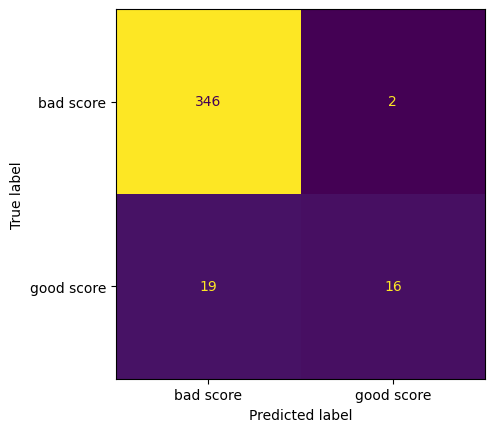

In [26]:
print(ConfusionMatrixDisplay.from_estimator(best2,X_tune,y_tune, display_labels = ['bad score','good score'], colorbar=False))

This confusion matrix tells us that propotionally, the model is better at predicting if the movie will produce a low imdb score than a high imdb score. This could be due to the low amount of high imdb scores in the dataset as our threshold was relatively high, however the proportion of correct guesses overall is good!

#19 What are the top 3 movies based on the tune set? Which variables are most important in predicting the top 3 movies?

In [27]:
top3 = X_tune.sort_values(by='num_voted_users', ascending=False).head(3)

index = top3.index
print(movie_metadata.loc[index, 'movie_title'])

66     The Dark Knight 
794       The Avengers 
0               Avatar 
Name: movie_title, dtype: object


I used the num_voted_users variable as we found out above it was the most important variable in predicting the imdb score. The top 3 movies are The Dark Knight, The Avengers, and Avatar.

#20 Use a different hyperparameter for the grid search function and go through the process above again using the tune set.

In [28]:
param3={"max_leaf_nodes":[10,20,30,40,50]}
search = GridSearchCV(cl, param3, scoring=scoring, n_jobs=-1, cv=kf,refit='roc_auc', verbose=3)
model3 = search.fit(X_tune, y_tune)

best3 = model3.best_estimator_

auc = model3.cv_results_['mean_test_roc_auc']
recall= model3.cv_results_['mean_test_recall']
bal_acc= model3.cv_results_['mean_test_balanced_accuracy']

SDauc = model3.cv_results_['std_test_roc_auc']
SDrecall= model3.cv_results_['std_test_recall']
SDbal_acc= model3.cv_results_['std_test_balanced_accuracy']

#Parameter:
leaf_nodes= np.unique(model3.cv_results_['param_max_leaf_nodes']).data

#Build DataFrame:
final_model3 = pd.DataFrame(list(zip(leaf_nodes, auc, recall, bal_acc,SDauc,SDrecall,SDbal_acc)),
               columns =['depth','auc','recall','bal_acc','aucSD','recallSD','bal_accSD'])

#Let's take a look
final_model3.style.hide(axis='index')

Fitting 50 folds for each of 5 candidates, totalling 250 fits
[CV 1/50] END max_leaf_nodes=10; balanced_accuracy: (test=0.443) recall: (test=0.000) roc_auc: (test=0.404) total time=   0.1s
[CV 2/50] END max_leaf_nodes=10; balanced_accuracy: (test=0.736) recall: (test=0.500) roc_auc: (test=0.911) total time=   0.1s
[CV 5/50] END max_leaf_nodes=10; balanced_accuracy: (test=0.833) recall: (test=0.667) roc_auc: (test=0.981) total time=   0.1s
[CV 4/50] END max_leaf_nodes=10; balanced_accuracy: (test=1.000) recall: (test=1.000) roc_auc: (test=1.000) total time=   0.1s
[CV 3/50] END max_leaf_nodes=10; balanced_accuracy: (test=0.875) recall: (test=0.750) roc_auc: (test=0.961) total time=   0.1s
[CV 14/50] END max_leaf_nodes=10; balanced_accuracy: (test=0.652) recall: (test=0.333) roc_auc: (test=0.714) total time=   0.1s
[CV 6/50] END max_leaf_nodes=10; balanced_accuracy: (test=0.790) recall: (test=0.667) roc_auc: (test=0.824) total time=   0.1s
[CV 8/50] END max_leaf_nodes=10; balanced_accura

depth,auc,recall,bal_acc,aucSD,recallSD,bal_accSD
10,0.773784,0.491667,0.724825,0.179331,0.277013,0.145982
20,0.702643,0.443333,0.696356,0.130142,0.237721,0.126902
30,0.700419,0.458333,0.700419,0.124341,0.232886,0.124341
40,0.700419,0.458333,0.700419,0.124341,0.232886,0.124341
50,0.700419,0.458333,0.700419,0.124341,0.232886,0.124341


In [165]:
print(best3)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=1000)


#21 Did the model improve with the new hyperparameter search?

No, the model became less accurate when we tested the model using different max_leaf_nodes. We found that the best model used max leaf node of 10, but this still had a lower AUC compared to the previous model where we tested different max depths.

#22 Using the better model, predict the test data and print out the results.

In [167]:
param={"max_depth" : [1,2,3,4,5,6,7,8,9,10,11]}

search = GridSearchCV(cl, param, scoring=scoring, n_jobs=-1, cv=kf,refit='roc_auc', verbose=3)
model = search.fit(X_test, y_test)

auc = model.cv_results_['mean_test_roc_auc']
recall= model.cv_results_['mean_test_recall']
bal_acc= model.cv_results_['mean_test_balanced_accuracy']

SDauc = model.cv_results_['std_test_roc_auc']
SDrecall= model.cv_results_['std_test_recall']
SDbal_acc= model.cv_results_['std_test_balanced_accuracy']

#Parameter:
depth= np.unique(model.cv_results_['param_max_depth']).data

#Build DataFrame:
final_model = pd.DataFrame(list(zip(depth, auc, recall, bal_acc,SDauc,SDrecall,SDbal_acc)),
               columns =['depth','auc','recall','bal_acc','aucSD','recallSD','bal_accSD'])

#Let's take a look
final_model.style.hide(axis='index')

Fitting 50 folds for each of 11 candidates, totalling 550 fits
[CV 4/50] END max_depth=1; balanced_accuracy: (test=0.625) recall: (test=0.250) roc_auc: (test=0.625) total time=   0.0s
[CV 2/50] END max_depth=1; balanced_accuracy: (test=0.721) recall: (test=0.500) roc_auc: (test=0.721) total time=   0.0s
[CV 6/50] END max_depth=1; balanced_accuracy: (test=0.819) recall: (test=0.667) roc_auc: (test=0.819) total time=   0.0s
[CV 8/50] END max_depth=1; balanced_accuracy: (test=0.500) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.0s
[CV 3/50] END max_depth=1; balanced_accuracy: (test=0.750) recall: (test=0.500) roc_auc: (test=0.750) total time=   0.0s
[CV 5/50] END max_depth=1; balanced_accuracy: (test=0.833) recall: (test=0.667) roc_auc: (test=0.833) total time=   0.1s
[CV 1/50] END max_depth=1; balanced_accuracy: (test=0.611) recall: (test=0.250) roc_auc: (test=0.611) total time=   0.1s
[CV 11/50] END max_depth=1; balanced_accuracy: (test=0.721) recall: (test=0.500) roc_auc: 

depth,auc,recall,bal_acc,aucSD,recallSD,bal_accSD
1,0.661896,0.346667,0.661896,0.115400,0.232952,0.115400
2,0.632011,0.255000,0.618349,0.121793,0.217569,0.107821
3,0.693130,0.255000,0.614357,0.168028,0.205757,0.104710
4,0.699417,0.356667,0.660317,0.173749,0.261958,0.129924
5,0.712449,0.315000,0.629181,0.134348,0.234692,0.116721
6,0.700303,0.356667,0.649401,0.113868,0.220504,0.110070
7,0.698980,0.368333,0.654099,0.112553,0.235755,0.116378
8,0.684719,0.378333,0.657368,0.124677,0.241068,0.121862
9,0.679936,0.383333,0.659868,0.127152,0.235702,0.119575
10,0.671821,0.390000,0.662630,0.123170,0.229395,0.117229


In [29]:
y_pred_prob = best2.predict_proba(X_test)[:,1]

mse = mean_squared_error(y_test, y_pred_prob)
rmse = mse**0.5

print(rmse)

0.2533086079779416


#23 Summarize what you learned along the way and make recommendations on how this could be used moving forward, being careful not to over promise.

Although the model we created isn't producing good enough results to be used reliably, we learned that the number of voted users is the most important variable in predicting the imdb score. Additionally, there were variables with no importance to the model, suggesting that there are many aspects of a movie that do not have any relationship with it's rating. We also learned that the best max depth and max number of leaf nodes for this decision tree were low, meaning that the data has low complexity and clear patterns. This model could potentially be improved by gathering data similar to that type, and training the model on that data as well. If this improves the models predictions, then this model could be used by the movie studio to predict which movies will have good ratings. 